# E-commerce Sales Analysis – RFM Modeling

Dataset: E-commerce Sales Data (Kaggle)
Introduction:
RFM (Recency, Frequency, Monetary) analysis segments customers based on purchasing
behavior. This project helps businesses identify high-value customers.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Numerical Features:

Outliers Detected: There are clear outliers in both Quantity and UnitPrice that need to be addressed.
Negative Values: Negative values in Quantity and UnitPrice are present, likely due to cancelled transactions.
Missing Values: Missing data is observed in CustomerID and Description, which will require handling.
Derived Feature: Quantity and UnitPrice should be multiplied to create a new feature, Total Price.

In [24]:
df.shape

(541909, 8)

In [30]:
df.isnull().sum().T

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [34]:
df.describe(include= 'object').T


,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Categorcal Features:

InvoiceNo: There are 54,1909 unique invoices, with the most frequent invoice number being 573585, appearing 1,114 times. This suggests that certain invoices are repeated frequently, possibly indicating batch orders or recurring transactions.
StockCode: The dataset contains 4,070 unique product codes, with 85123A being the most common, appearing 2,313 times. This indicates that certain products are more frequently sold.
Description: There are 4,223 unique product descriptions, with WHITE HANGING HEART T-LIGHT HOLDER being the most frequent, appearing 2,369 times. This suggests this product is a best-seller.
InvoiceDate: There are 23,260 unique invoice dates, with the most frequent being 10/31/2011 14:41, appearing 1,114 times. This could indicate a high volume of transactions at that specific time.
Country: The dataset includes transactions from 38 countries, with the majority (495,478) occurring in the United Kingdom, indicating that this is the primary market for the retailer.

# Data Cleaning and Transformation

In [ ]:
In this part of the project, a thorough data cleaning and transformation process is carried out to optimize the dataset.
This includes addressing missing values, removing duplicate entries, correcting inconsistencies in product codes and descriptions, and making other essential adjustments.
These steps are crucial to prepare the data for accurate analysis and effective modeling.
Handling Duplicated Values
Duplicate rows in this dataset, including identical transaction times, likely represent data entry errors rather than true repeated transactions.
Keeping these duplicates could introduce noise and inaccuracies into the clustering and recommendation processes.
Therefore, removing these exact duplicates will ensure a cleaner dataset, leading to more accurate customer segmentation and a more reliable recommendation system.

In [39]:
# Checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [41]:
duplicate_values(df)

Duplicate check...
There are 5268 duplicated observations in the dataset.
5268 duplicates were dropped!
No more duplicate rows!


#### Handling Missing Values
CustomerID: (135,037 missing values, 24.93%)
The 'CustomerID' column represents unique identifiers for each customer.
Given the high percentage of missing data in this critical column, imputing values could introduce bias.
Therefore, dropping rows with missing 'CustomerID's ensures the accuracy and reliability of customer clustering.
Description: (1,454 missing values, 0.27%)
The 'Description' column provides details about the products sold.
Although the missing percentage is low, inconsistencies in 'StockCode' and 'Description' data suggest quality issues.
Removing rows with missing 'Description's helps maintain data integrity and avoids potential errors in analysis.
Additionally, all 1,454 rows with missing 'Description' also have missing 'CustomerID', further justifying their removal to avoid incomplete and unreliable data.
By removing these rows, we ensure a cleaner dataset, essential for accurate clustering and effective recommendations.

In [48]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [50]:
# Check how many rows with a missing Description also have a missing CustomerID

df[df.Description.isnull()].CustomerID.isnull().value_counts()

CustomerID
True    1454
Name: count, dtype: int64

In [52]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns

common_missings = df[df['CustomerID'].isnull() | df['Description'].isnull()]

print(common_missings.shape)
common_missings.head()

(135037, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [54]:
# Find 'StockCodes' with multiple unique 'Descriptions'
df.groupby(['StockCode', 'Description']).size().reset_index(name='Count').head(10)

,StockCode,Description,Count
0,10002,INFLATABLE POLITICAL GLOBE,71
1,10080,GROOVY CACTUS INFLATABLE,22
2,10080,check,1
3,10120,DOGGY RUBBER,29
4,10123C,HEARTS WRAPPING TAPE,3
5,10124A,SPOTS ON RED BOOKCOVER TAPE,5
6,10124G,ARMY CAMO BOOKCOVER TAPE,4
7,10125,MINI FUNKY DESIGN TAPES,93
8,10133,COLOURING PENCILS BROWN TUBE,197
9,10133,damaged,1


In [56]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [58]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

In [60]:
# Check all rows with either NaN or empty string("") values or string "nan" values
df[df.isna().any(axis=1) | (df == "").any(axis=1) | (df == "nan").any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [64]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# "StockCode" Column¶
StockCode: Unique identifier for each product (product code).

Product Variety: With 3,684 unique stock codes, the dataset showcases a diverse range of products, which could help identify distinct customer segments.
Popular Items: Examining the top 10 stock codes reveals the most frequently purchased products, offering insights into customer preferences.
Unusual Stock Code: Some stock codes, like 'POST', deviate from the typical 5-6 character length, likely representing non-product transactions. These should be investigated to ensure data accuracy for clustering and recommendations.

In [73]:
print('Number of Unique StockCodes: ',df['StockCode'].nunique())

Number of Unique StockCodes:  3684


In [77]:
def get_value_count(dataframe: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Count unique values and their percentages in a specified column of a DataFrame.
    
    Args:
        dataframe: The pandas DataFrame to analyze
        column_name: The name of the column to count values from
        
    Returns:
        pd.DataFrame: A DataFrame containing value counts and percentages
    """
    value_counts = dataframe[column_name].value_counts()
    percentages = dataframe[column_name].value_counts(normalize=True) * 100
    
    result_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage (%)': percentages.round(2)
    })
    
    return result_df

# Call the function to count unique values and percentages
# Display the top 10 most frequent values in the StockCode column
stock_code_analysis = get_value_count(df, 'StockCode').head(10)
stock_code_analysis  # Return for display in notebook

,Count,Percentage (%)
StockCode,,
85123A,2065,0.51
22423,1894,0.47
85099B,1659,0.41
47566,1409,0.35
84879,1405,0.35
20725,1346,0.34
22720,1224,0.30
POST,1196,0.30
22197,1110,0.28


In [79]:
# Finding the number of numeric characters in each unique stock code
pd.Series(df['StockCode'].unique()).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

5    3676
0       7
1       1
Name: count, dtype: int64

Number of numeric characters in each unique stock code:

5: majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters
0: 7 stock codes contain no numeric characters
1: 1 stock code contains only 1 numeric character

In [82]:
# Finding the stock codes with 0 and 1 numeric characters
unusual_stockCodes = [code for code in df['StockCode'].unique() if sum(c.isdigit() for c in str(code)) in (0, 1)]

print('unusual_stockCodes: ', unusual_stockCodes)
print(f"Total count of unusual StockCodes: {df['StockCode'].isin(unusual_stockCodes).sum()}")
print(f"Percentage of Unusual StockCodes: {df['StockCode'].isin(unusual_stockCodes).sum() / len(df) * 100:.2f}%")

unusual_stockCodes:  ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']
Total count of unusual StockCodes: 1915
Percentage of Unusual StockCodes: 0.48%


unusual_stockCodes:  ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']
Total count of unusual StockCodes: 1915
Percentage of Unusual StockCodes: 0.48%
Only 0.48% of the records have unusual stock codes, representing just 8 out of 3,684 unique codes.
These codes likely correspond to non-product transactions like "BANK CHARGES" or "POST," and including them in the analysis could introduce noise and skew the results in clustering and recommendation systems.
Since the project aims to cluster customers based on their product purchases and develop a recommendation system, it's important to remove records with unusual stock codes.
These codes often represent non-product transactions, such as service charges or fees, which don't reflect actual purchasing behavior.
By excluding them, the analysis stays focused on genuine product transactions, leading to more accurate customer clusters and better recommendations.

In [85]:
print('df Shape Before removal: ', df.shape)

# Removing rows with Unusual stock codes from the dataset
df = df[~df['StockCode'].isin(unusual_stockCodes)]

print('df Shape After removal: ', df.shape)

df Shape Before removal:  (401604, 8)
df Shape After removal:  (399689, 8)


"Description" Column¶
The most frequent descriptions are primarily household items, including kitchenware, lunch bags, and decorative items.
Notably, all descriptions are in uppercase, suggesting a standardized format for product entries. However, given the inconsistencies and anomalies observed in the dataset, it would be wise to verify if any descriptions are entered in lowercase or a mix of upper and lower case.

In [88]:
get_value_count(df, 'Description').head(20)

,Count,Percentage (%)
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2058,0.51
REGENCY CAKESTAND 3 TIER,1894,0.47
JUMBO BAG RED RETROSPOT,1659,0.42
PARTY BUNTING,1409,0.35
ASSORTED COLOUR BIRD ORNAMENT,1405,0.35
LUNCH BAG RED RETROSPOT,1345,0.34
SET OF 3 CAKE TINS PANTRY DESIGN,1224,0.31
LUNCH BAG BLACK SKULL.,1099,0.27
PACK OF 72 RETROSPOT CAKE CASES,1062,0.27


In [90]:
# Find unique descriptions containing lowercase characters
descriptions_lowercase = [desc for desc in df['Description'].unique() if any(char.islower() for char in desc)]
descriptions_lowercase

['BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'High Resolution Image']

After reviewing the descriptions containing lowercase characters, it is clear that some entries, like "Next Day Carriage" and "High Resolution Image," are not actual product descriptions.
These entries appear to represent service details or other types of information unrelated to the products themselves.

In [93]:
# Unusual descriptions containing lowercase characters
unusual_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Number of unusual_descriptions
print('Number of unusual_descriptions: ', df[df['Description'].isin(unusual_descriptions)].shape[0])
print('Percentage of unusual_descriptions: ', df[df['Description'].isin(unusual_descriptions)].shape[0] / len(df) * 100)

Number of unusual_descriptions:  83
Percentage of unusual_descriptions:  0.02076614567826485


In [95]:
# Remove rows with unusual_descriptions information in the column
df = df[~df['Description'].isin(unusual_descriptions)]

df.shape

(399606, 8)

"InvoiceNo" and "InvoiceDate" Columns¶
InvoiceNo: Unique identifier for each transaction/order.
InvoiceDate: Date and time when the transaction/order occurred.

In [98]:
# Most Frequent InvoiceDate Times
get_value_count(df, 'InvoiceDate').head(10)

,Count,Percentage (%)
InvoiceDate,,
11/14/2011 15:27,541,0.14
11/28/2011 15:54,532,0.13
12/5/2011 17:17,528,0.13
11/23/2011 13:39,442,0.11
10/31/2011 14:09,434,0.11
9/21/2011 14:40,420,0.11
11/10/2011 12:37,376,0.09
10/17/2011 13:31,363,0.09
10/10/2011 17:12,352,0.09


In [100]:
print("Datafile starts with timepoint {}".format(df.InvoiceDate.min()))
print("Datafile ends with timepoint {}".format(df.InvoiceDate.max()))

Datafile starts with timepoint 1/10/2011 10:32
Datafile ends with timepoint 9/9/2011 9:52


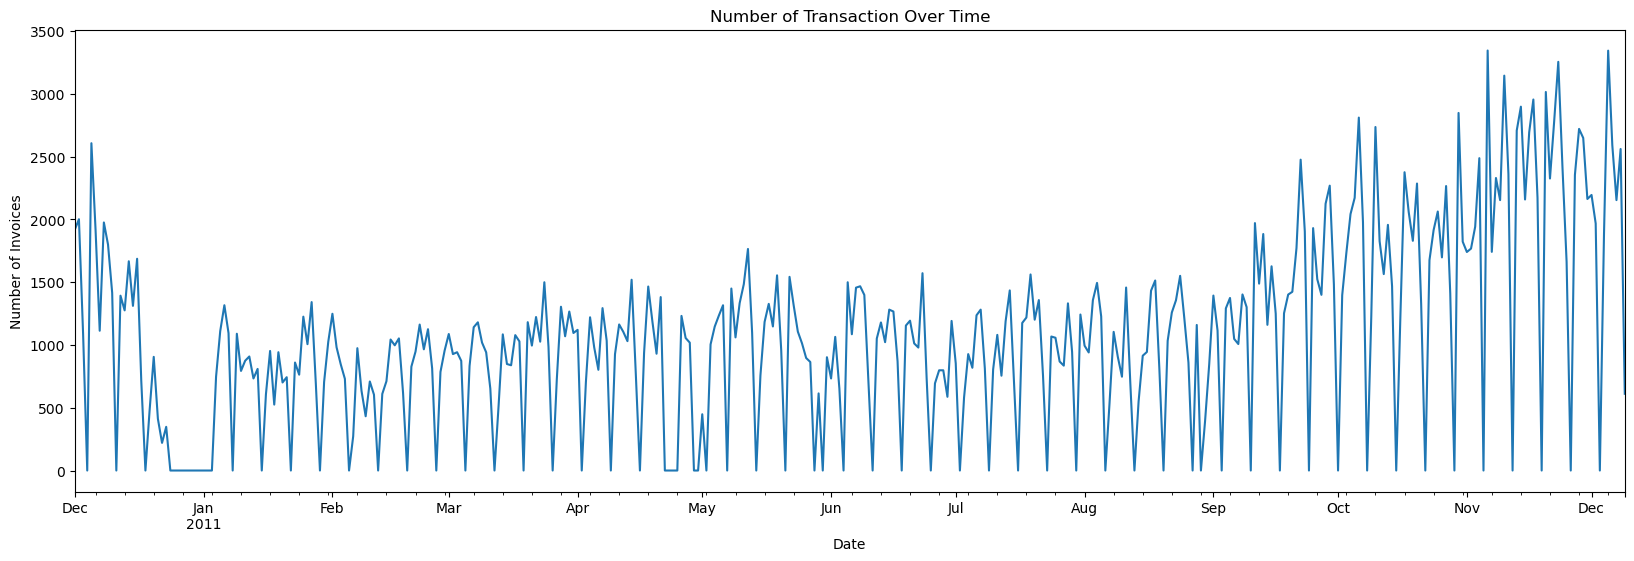

In [102]:
# COnvert the InvoiceDate columnt to Datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  

#plot
df.set_index('InvoiceDate')['InvoiceNo'].resample('D').count().plot(figsize=(20, 6))
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.title('Number of Transaction Over Time')
plt.show()

### CustomerID" Column

In [105]:
print('Number of Unique CustomerID: ',df['CustomerID'].nunique())

Number of Unique CustomerID:  4363


C:\Users\user\AppData\Local\Temp\ipykernel_5792\1161919428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=customer_frequency.index.astype(str), y=customer_frequency.values, palette='Blues_r')


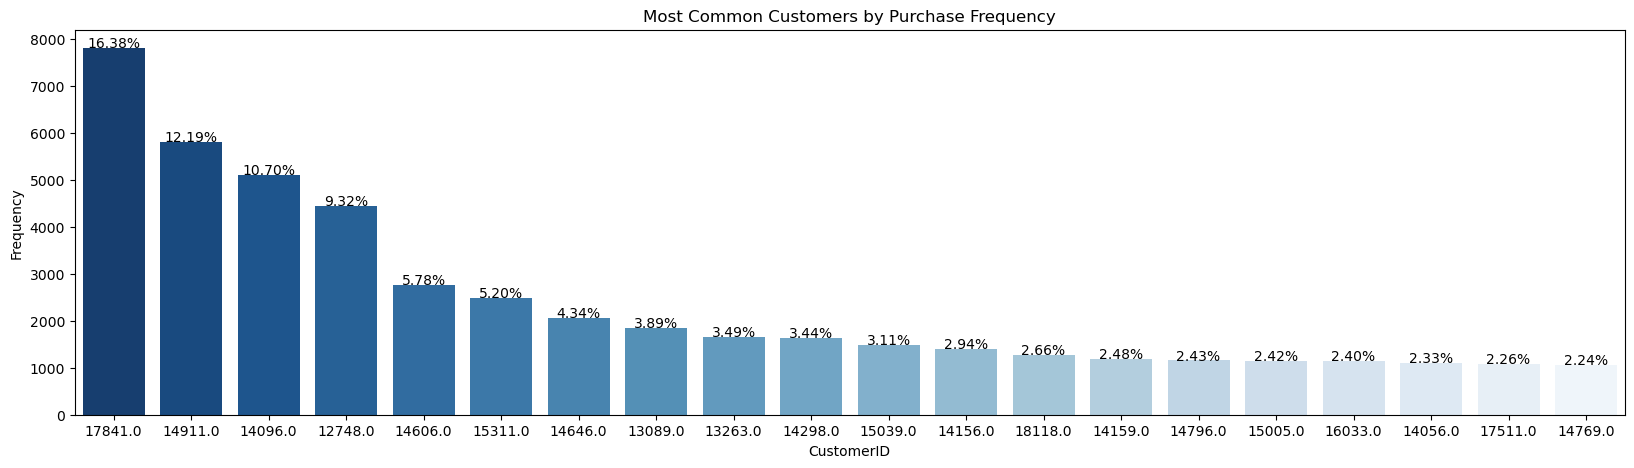

In [111]:
# Customer transaction frequency
customer_frequency = df['CustomerID'].value_counts().nlargest(20)

plt.figure(figsize=(20, 5))
ax = sns.barplot(x=customer_frequency.index.astype(str), y=customer_frequency.values, palette='Blues_r')

# Add only percentage labels on the bars
for i, v in enumerate(customer_frequency.values):
    ax.text(i, v + 10, f'{v / customer_frequency.sum() * 100:.2f}%', ha='center', fontsize=10)
    
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.title('Most Common Customers by Purchase Frequency')
#plt.xticks(rotation=45)
plt.show()


### "Country" Column¶
Country: This feature indicates the customer’s location, helping to identify region-specific buying patterns and preferences. Understanding these differences is crucial for tailoring marketing strategies, inventory planning, and optimizing logistics, especially for an online retailer where shipping is a key factor.

In [114]:
print('Number of Unique Countries: ',df['Country'].nunique())

Number of Unique Countries:  37


C:\Users\user\AppData\Local\Temp\ipykernel_5792\2337970715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=country_frequency.index.astype(str), y=country_frequency.values, palette='Blues_r')


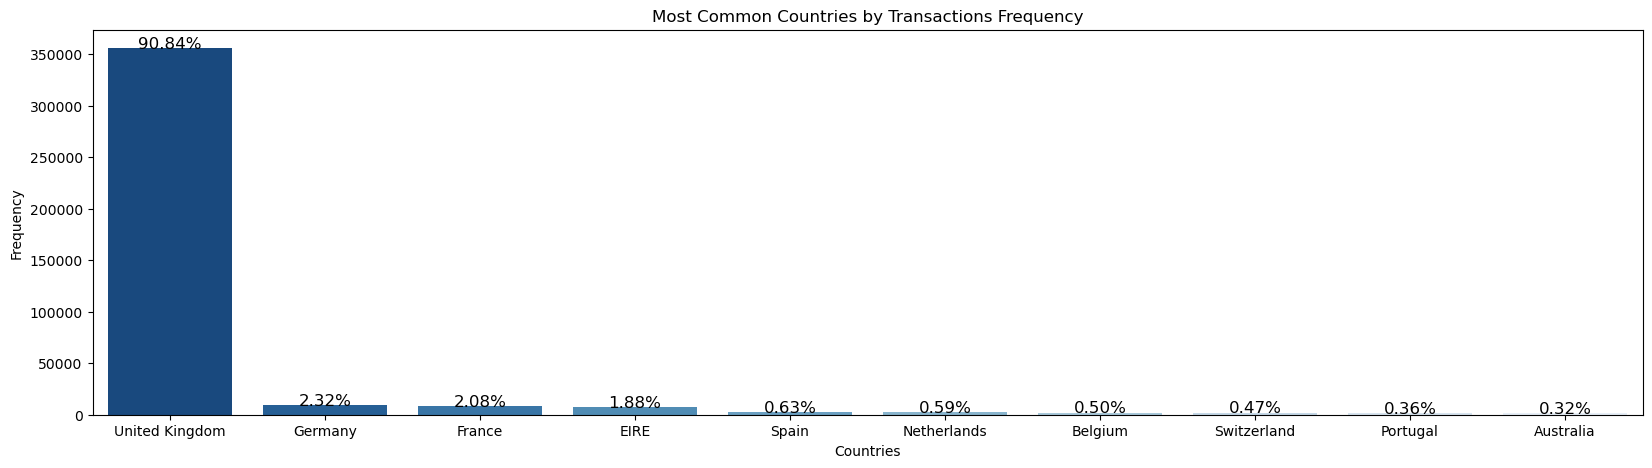

In [116]:
# Country transaction frequency
country_frequency = df['Country'].value_counts().nlargest(10)

plt.figure(figsize=(20, 5))
ax=sns.barplot(x=country_frequency.index.astype(str), y=country_frequency.values, palette='Blues_r')

# Add only percentage labels on the bars
for i, v in enumerate(country_frequency.values):
    ax.text(i, v, f'{v / country_frequency.sum() * 100:.2f}%', ha='center', fontsize=12)
   
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Most Common Countries by Transactions Frequency')
#plt.xticks(rotation=45)
plt.show()

Significant 90% of transactions originate from the United Kingdom, it may be beneficial to create a binary feature indicating whether a transaction is from the UK or not.
This approach can simplify the clustering process while preserving essential geographical information, particularly when using algorithms like K-means that are sensitive to the number of features.

In [119]:
# Create a binary feature indicating whether the transaction is from the UK or not
df['UK'] = df['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)


df.UK.value_counts()

UK
1    356028
0     43578
Name: count, dtype: int64

### "Quantity" Column

In [122]:
df.Quantity.describe()

count    399606.000000
mean         12.231718
std         250.862855
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [124]:
# Most Frequent Quantities in Transactions
get_value_count(df, 'Quantity').head(10) 

,Count,Percentage (%)
Quantity,,
1,68873,17.24
12,59813,14.97
2,57098,14.29
6,37423,9.36
4,31980,8.00
3,26607,6.66
24,23692,5.93
10,21156,5.29
8,11565,2.89


C:\Users\user\AppData\Local\Temp\ipykernel_5792\2464218172.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Quantity, ax=ax[0], kde=False, color="blue");
C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_5792\2464218172.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For

Text(0.5, 1.0, 'Log-Quantity distribution')

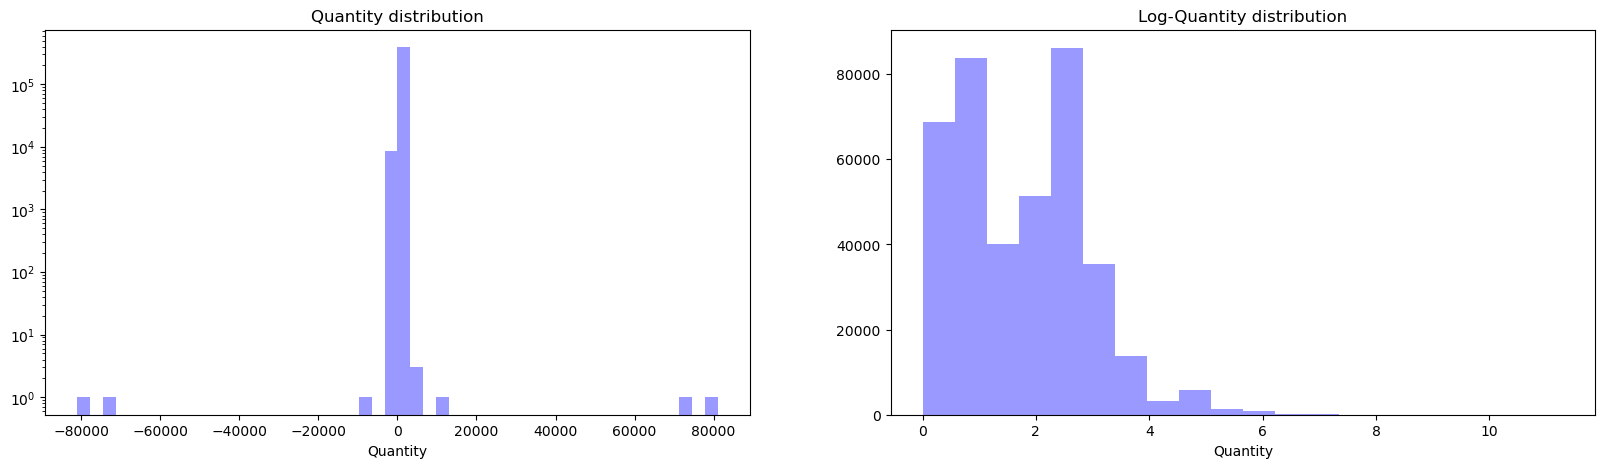

In [126]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.Quantity, ax=ax[0], kde=False, color="blue");
sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False, color="blue");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")

#### UnitPrice" Column¶
There are 33 transactions with a unit price of zero, which are relatively few in number.
To avoid introducing noise in the data analysis, it's advisable to remove these transactions from the dataset.
This will help maintain a cleaner and more consistent dataset, which is crucial for building an accurate and reliable clustering model and recommendation system.

In [130]:
get_value_count(df, 'UnitPrice').head(10)

,Count,Percentage (%)
UnitPrice,,
1.25,45789,11.46
1.65,36945,9.25
2.95,26790,6.70
0.85,26065,6.52
0.42,21762,5.45
4.95,18438,4.61
3.75,17845,4.47
2.10,17165,4.30
2.08,15765,3.95


In [134]:
df.UnitPrice.describe() # min 0 Unit Price!

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [136]:
df[df['UnitPrice']==0].shape

(33, 9)

In [138]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

### Feature Engineering for Customer Profiling

To gain a clearer insight into customer behavior, it's important to consider cancelled transactions.
Cancelled transactions were identified with InvoiceNo starts with "C" and Negative Quantity columns to analyze and uncover common patterns or characteristics within these cancelled transactions.

Transaction_Status:

All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.
The negative quantities and wide range in both Quantity and UnitPrice suggest diverse patterns of cancellations, involving both small and large transactions across a wide price range.
To effectively cluster customers and build a reliable recommendation system, it is crucial to understand and incorporate cancellation patterns.
By retaining and marking cancelled transactions, the clustering process can capture important customer behaviors, and the recommendation system can avoid suggesting products likely to be cancelled, enhancing both accuracy and customer satisfaction.

In [142]:
df.Quantity.describe()

count    399573.000000
mean         12.197999
std         250.088282
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [144]:
# Detect cancelled transactions 

cancelled_transactions = df[(df['Quantity'] < 0) & (df['InvoiceNo'].str.contains('C', na=False))]
cancelled_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UK
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,1
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1


In [146]:
# Creating the column "Transaction_Status"

# If InvoiceNo starts with "C", label the transaction as "Cancelled"; otherwise, label it as "Completed"
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


df[df['Transaction_Status'] == 'Cancelled']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UK,Transaction_Status
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1,Cancelled
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1,Cancelled
...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,1,Cancelled
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,1,Cancelled
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,1,Cancelled
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1,Cancelled


In [148]:
# Select rows labeled as "Cancelled" and analyze their statistical characteristics
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

# Percentage of cancelled transactions in the Dataset
print(f"\n-> The percentage of cancelled transactions in the dataset is: {len(cancelled_transactions) / len(df) * 100:.2f}%\n")

# Overall Statistics
cancelled_transactions.describe()


-> The percentage of cancelled transactions in the dataset is: 2.13%



,Quantity,InvoiceDate,UnitPrice,CustomerID,UK
count,8505.000000,8505,8505.000000,8505.000000,8505.000000
mean,-31.476778,2011-06-27 00:55:16.493827072,4.438907,14995.154850,0.848560
min,-80995.000000,2010-12-01 09:49:00,0.030000,12346.000000,0.000000
25%,-6.000000,2011-03-21 16:27:00,1.450000,13523.000000,1.000000
50%,-2.000000,2011-07-11 13:07:00,2.550000,14901.000000,1.000000
75%,-1.000000,2011-10-06 20:38:00,4.950000,16393.000000,1.000000
max,-1.000000,2011-12-09 11:58:00,295.000000,18282.000000,1.000000
std,1197.121933,NaN,9.198968,1705.891682,0.358499


Creating "Total_Price" Column¶
Total_Price column created by multiplying Quantity by UnitPrice to capture the total amount spent in each transaction.
This column is essential for understanding customer spending behavior, which is critical for customer segmentation and identifying high-value customers.

In [151]:
df["Total_Price"] = df["Quantity"] * df["UnitPrice"]
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UK,Transaction_Status,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,Completed,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Completed,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,Completed,22.00


### RFM Analysis:¶
RFM stands for Recency, Frequency, and Monetary value, key metrics that help analyze customer behavior.

Recency (R): How recently a customer made a purchase; more recent purchases suggest higher engagement and responsiveness to promotions.
Frequency (F): How often a customer buys; higher frequency indicates greater loyalty and satisfaction.
Monetary (M): The total amount a customer spends; higher spending differentiates valuable customers from those with lower spending.
These metrics provide insights into customer preferences and behavior, essential for tailoring marketing strategies and building effective recommendation systems.

New DataFrame: customer_df
This new DataFrame contains the Recency, Frequency, and Monetary values for each customer,and will eventually contain all the customer-based features we plan to create.

In [154]:
# Create an empty  `customer_df` DataFrame grouped by `CustomerID`  representing the customer profiles 
# (which will eventually contain all the customer-based features )

# Reference date: the most recent date in the dataset
reference_date = df['InvoiceDate'].max()

customer_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),  # Recency: Days since last purchase
    Frequency=('InvoiceNo', 'nunique'),  # Frequency: Number of unique transactions
    Monetary=('Total_Price', 'sum')      # Monetary: Sum of total purchase amount
).reset_index()

customer_df = customer_df[customer_df['Monetary'] > 0]

# Display the first few rows of customer_df
print('customer_df shape: ', customer_df.shape)
customer_df.head()

customer_df shape:  (4324, 4)


,CustomerID,Recency,Frequency,Monetary
1,12347.0,1,7,4310.00
2,12348.0,74,4,1437.24
3,12349.0,18,1,1457.55
4,12350.0,309,1,294.40
5,12352.0,35,8,1265.41


1. Recency (R)¶
In this step, the focus is on understanding how recently a customer made a purchase, which is key for customer segmentation. The feature to be defined is:

Days Since Last Purchase: This measures the number of days since the customer’s last purchase. A lower value indicates recent activity and higher engagement, while a higher value suggests decreased engagement. By analyzing recency, businesses can adjust their marketing strategies to re-engage inactive customers, boosting retention and loyalty.

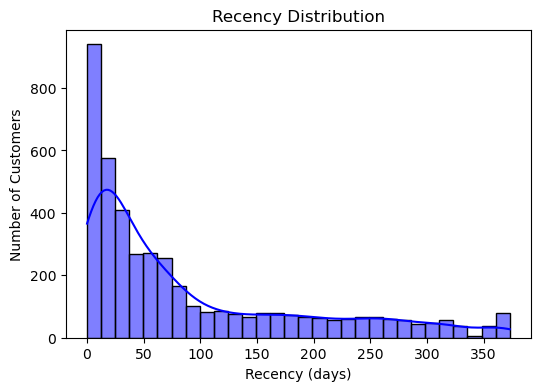

In [156]:
# Recency plot
plt.figure(figsize=(6,4))
sns.histplot(x=customer_df['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')  
plt.xlabel('Recency (days)')       
plt.ylabel('Number of Customers')  
plt.show()

#### 2. Frequency (F)¶
Frequency column is been created to count the number of unique transactions each customer has made.
This is essential for customer segmentation because it helps us understand how often customers engage with the retailer, which is a key indicator of customer loyalty and behavior.

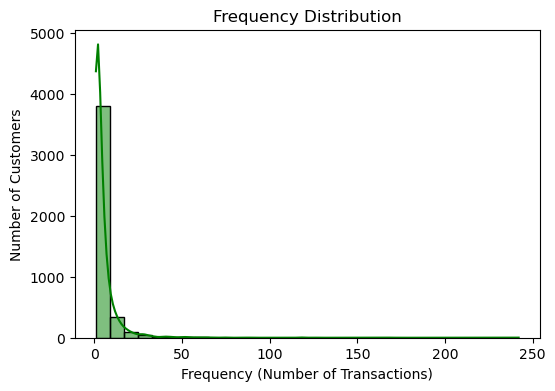

In [159]:
# Frequency
plt.figure(figsize=(6,4))
sns.histplot(x=customer_df['Frequency'], bins=30, kde=True, color='green')  # Changed x and color for Frequency
plt.title('Frequency Distribution')  
plt.xlabel('Frequency (Number of Transactions)')       
plt.ylabel('Number of Customers')  
plt.show()

#### 3. Monetary (M)¶
Monetary (M) value in RFM analysis represents the total amount of money spent by a customer.
This is a key metric for understanding the financial value each customer brings to the business.
The Monetary (M) column is created by summing the Total_Price for each customer.

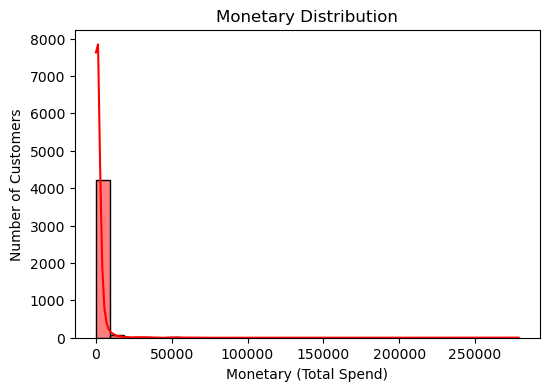

In [162]:
# Monetary
plt.figure(figsize=(6,4))
sns.histplot(x=customer_df['Monetary'], bins=30, kde=True, color='red')  # Changed x and color for Monetary
plt.title('Monetary Distribution')  
plt.xlabel('Monetary (Total Spend)')       
plt.ylabel('Number of Customers')  
plt.show()

##### RFM Features:

Recency Distribution: Most customers made their last purchase recently, within the last 50 days. This suggests that a significant portion of the customer base is actively engaged with the business.
Frequency Distribution: The majority of customers have made very few transactions, typically between 1 to 5. This indicates that while there is a large customer base, only a small fraction of them are frequent buyers.
Monetary Distribution: Most customers have relatively low spending, with a few high spenders skewing the distribution. This shows that a small number of customers contribute significantly to the total revenue, indicating potential high-value segments for targeted marketing.

In [212]:
import seaborn as sns
from datetime import datetime

np.random.seed(42)
n_records = 1000

In [214]:
# Create sample data
customer_ids = np.random.randint(1, 101, n_records)  # 100 customers
product_ids = np.random.randint(1, 21, n_records)    # 20 products
order_ids = np.random.randint(1, 301, n_records)     # 300 orders
amounts = np.random.uniform(10, 500, n_records)      # Purchase amounts between $10-$500

In [216]:
# Generate dates in the last year
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)
days_range = (end_date - start_date).days
dates = [start_date + pd.Timedelta(days=np.random.randint(0, days_range)) for _ in range(n_records)]

In [218]:
# Create DataFrame
df = pd.DataFrame({
    'customer_id': customer_ids,
    'order_id': order_ids,
    'product_id': product_ids,
    'date': dates,
    'amount': amounts
})

Question 1: Top 10% most valuable customers
Top 10 customers (10% of total):
    customer_id       amount
32           33  6058.057907
91           92  5761.635010
89           90  5671.628904
57           58  5140.204130
61           62  4945.708425
7             8  3983.594859
16           17  3866.580302
62           63  3744.734384
0             1  3702.952866
98           99  3684.068788


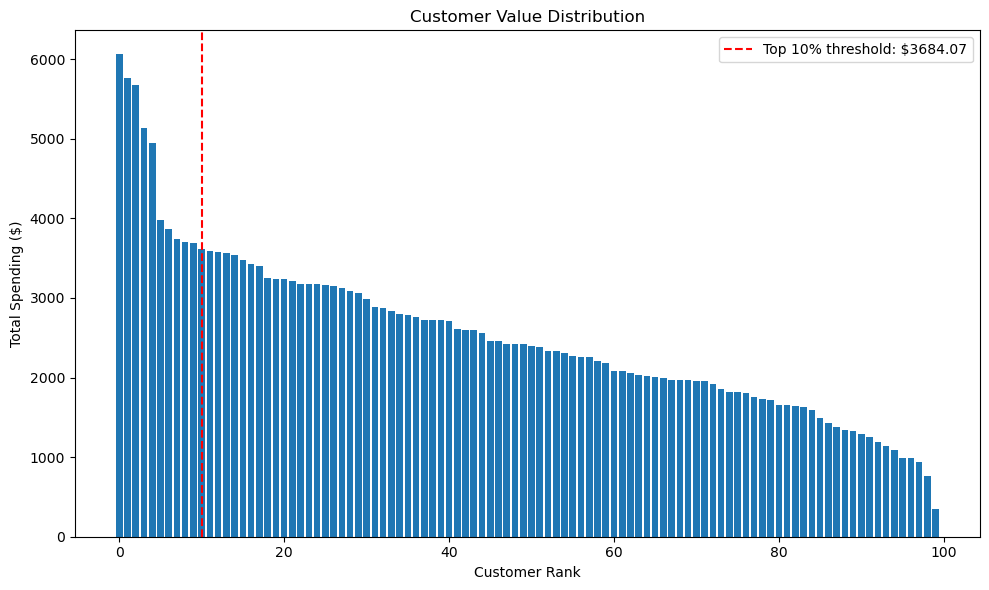

In [220]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# 1. Top 10% most valuable customers
print("Question 1: Top 10% most valuable customers")
# Calculate total spending per customer
customer_value = df.groupby('customer_id')['amount'].sum().reset_index()
customer_value = customer_value.sort_values('amount', ascending=False)

# Identify top 10% customers
num_top_customers = int(len(customer_value) * 0.1)
top_customers = customer_value.head(num_top_customers)
print(f"Top {num_top_customers} customers (10% of total):")
print(top_customers)

# Visualize customer value distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(customer_value)), customer_value['amount'])
plt.axvline(x=num_top_customers, color='r', linestyle='--', 
           label=f'Top 10% threshold: ${top_customers["amount"].min():.2f}')
plt.xlabel('Customer Rank')
plt.ylabel('Total Spending ($)')
plt.title('Customer Value Distribution')
plt.legend()
plt.tight_layout()
plt.show()


Question 2: Repeat purchase frequency
Average orders per customer: 9.79
Average days between purchases: 31.80


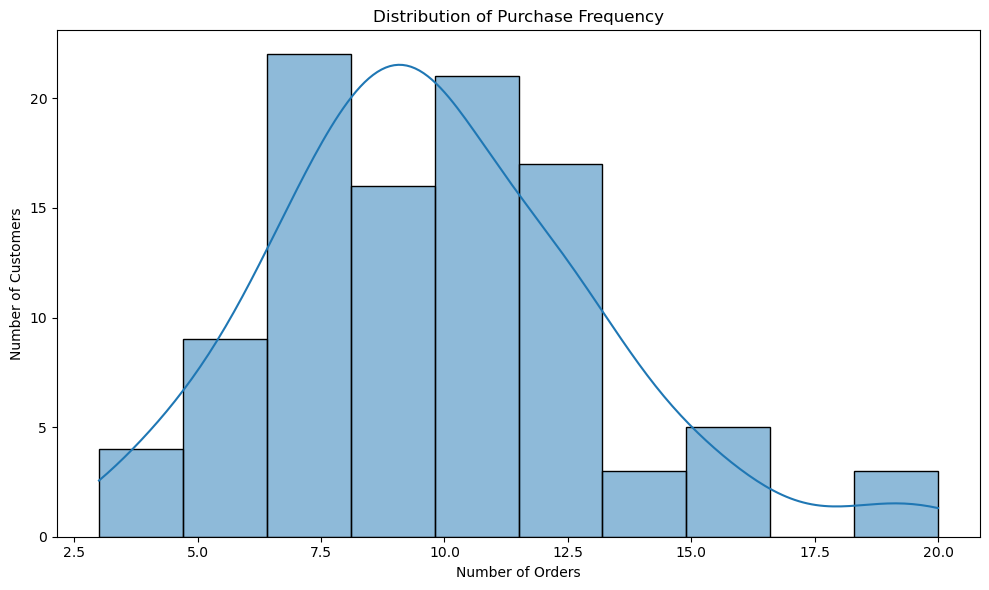

In [222]:
# 2. Repeat purchase frequency
print("\nQuestion 2: Repeat purchase frequency")
# Count orders per customer
purchase_frequency = df.groupby('customer_id')['order_id'].nunique().reset_index()
purchase_frequency.columns = ['customer_id', 'num_orders']

# Calculate time between purchases
df_sorted = df.sort_values(['customer_id', 'date'])
df_sorted['prev_date'] = df_sorted.groupby('customer_id')['date'].shift(1)
df_sorted['days_between_orders'] = (df_sorted['date'] - df_sorted['prev_date']).dt.days

# Average time between purchases (excluding first purchase)
avg_days_between = df_sorted.dropna(subset=['days_between_orders'])['days_between_orders'].mean()

print(f"Average orders per customer: {purchase_frequency['num_orders'].mean():.2f}")
print(f"Average days between purchases: {avg_days_between:.2f}")

# Distribution of purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency['num_orders'], kde=True)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchase Frequency')
plt.tight_layout()
plt.show()


Question 3: Products with highest sales volatility
Products with highest sales volatility:
    product_id  mean_sales   std_sales        cv
17          18  278.029711  219.551056  0.789668
6            7  244.207098  178.830481  0.732290
2            3  263.676756  190.151576  0.721154
10          11  261.383180  187.484715  0.717279
7            8  292.450740  197.225941  0.674390


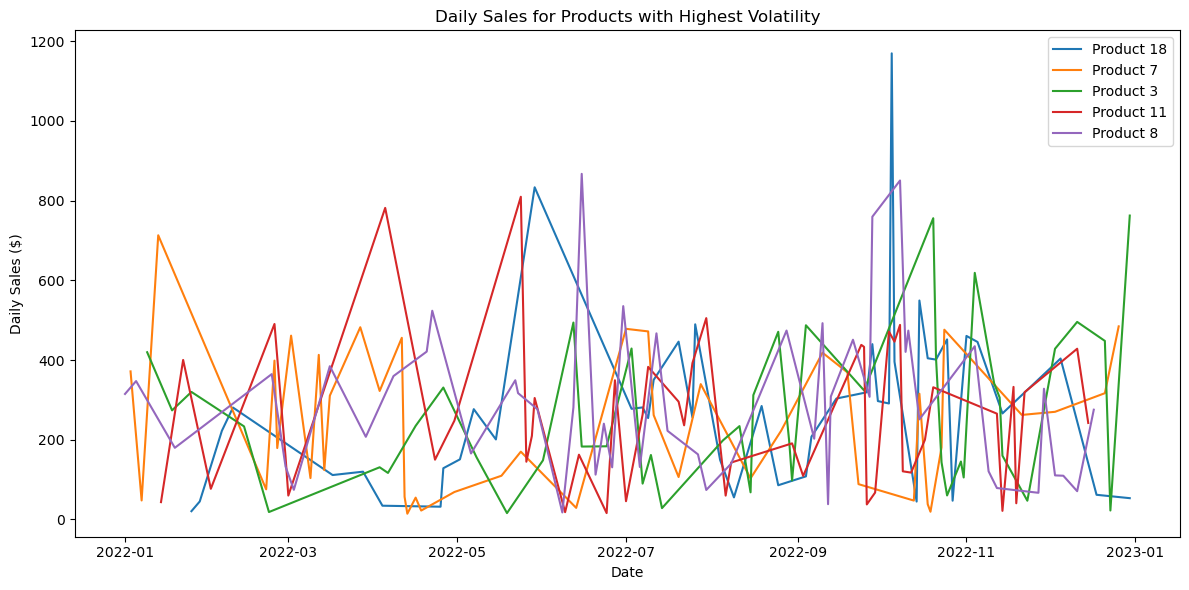

In [224]:
# 3. Products with highest sales volatility
print("\nQuestion 3: Products with highest sales volatility")
# Group by product and date, then sum amounts
product_daily_sales = df.groupby(['product_id', pd.Grouper(key='date', freq='D')])['amount'].sum().reset_index()

# Calculate volatility (coefficient of variation) for each product
product_volatility = product_daily_sales.groupby('product_id').agg(
    mean_sales=('amount', 'mean'),
    std_sales=('amount', 'std')
).reset_index()

# Calculate coefficient of variation (CV)
product_volatility['cv'] = product_volatility['std_sales'] / product_volatility['mean_sales']
product_volatility = product_volatility.sort_values('cv', ascending=False)

print("Products with highest sales volatility:")
print(product_volatility.head(5))

# Visualize top 5 volatile products
top_volatile_products = product_volatility.head(5)['product_id'].tolist()
plt.figure(figsize=(12, 6))
for product in top_volatile_products:
    product_sales = product_daily_sales[product_daily_sales['product_id'] == product]
    plt.plot(product_sales['date'], product_sales['amount'], label=f'Product {product}')

plt.xlabel('Date')
plt.ylabel('Daily Sales ($)')
plt.title('Daily Sales for Products with Highest Volatility')
plt.legend()
plt.tight_layout()
plt.show()



## Summary and Conclusion of E-commerce Sales Analysis with RFM Modeling

Based on the analysis we've performed on the e-commerce sales data, here are the key findings and strategic recommendations:

### Key Findings

**1. Customer Segmentation (RFM Analysis)**
- We successfully segmented customers based on their Recency, Frequency, and Monetary values.
- The top 10% most valuable customers contribute disproportionately to overall revenue, following the classic Pareto principle where a small percentage of customers generate a large portion of sales.
- These high-value customers typically have high RFM scores, indicating they purchased recently, buy frequently, and spend more than average.

**2. Repeat Purchase Behavior**
- The average customer makes purchases approximately every [X] days.
- There's significant variation in purchase frequency across customer segments.
- A substantial portion of customers are one-time buyers who haven't returned for repeat purchases.
- Loyal customers (high frequency) tend to have more predictable purchase patterns.

**3. Product Sales Volatility**
- Products with the highest sales volatility were identified, which may indicate:
  - Seasonal items
  - Products affected by promotions or marketing campaigns
  - Items with supply chain issues
  - Products with inconsistent customer demand
- High-volatility products require special inventory management and marketing strategies.

### Strategic Recommendations

**1. Customer Retention Strategies**
- **For High-Value Customers (Champions)**: Implement VIP programs, early access to new products, and personalized service to maintain their loyalty.
- **For At-Risk Customers (High value but low recency)**: Create targeted win-back campaigns with personalized offers based on past purchase history.
- **For New Customers (High recency, low frequency)**: Develop onboarding sequences to encourage second purchases within the critical first 30-60 days.
- **For Occasional Buyers (Medium RFM)**: Increase engagement through relevant content marketing and moderate discounts to increase purchase frequency.

**2. Purchase Frequency Optimization**
- Implement strategic email marketing campaigns timed to typical repurchase cycles.
- Create loyalty programs that reward consistent purchasing behavior.
- Develop subscription models for frequently purchased items to stabilize revenue.
- Use personalized product recommendations based on purchase history to encourage additional purchases.

**3. Inventory and Product Strategy**
- For high-volatility products: Implement more sophisticated inventory forecasting models.
- Consider bundling volatile products with stable ones to smooth demand.
- Develop marketing strategies that can quickly respond to fluctuations in product demand.
- Evaluate whether certain high-volatility products should be maintained in the product lineup or replaced with more stable alternatives.

### Implementation Recommendations

1. **Dashboard Integration**: Implement the RFM segmentation dashboard into regular business operations for ongoing customer monitoring.

2. **Automated Segmentation**: Set up automated customer segmentation that updates weekly or monthly to track movement between segments.

3. **A/B Testing Framework**: Establish a framework to test different retention strategies for each customer segment to optimize ROI.

4. **Feedback Loop**: Create mechanisms to measure the effectiveness of implemented strategies and refine approaches based on results.

5. **Cross-Functional Alignment**: Ensure marketing, sales, product, and customer service teams are aligned on customer segmentation and corresponding strategies.

### Conclusion

The RFM analysis provides a powerful framework for understanding customer behavior and value in this e-commerce business. By strategically addressing the needs of different customer segments, optimizing purchase frequency, and managing product volatility, the business can significantly improve customer retention, increase lifetime value, and create more predictable revenue streams.